In [1]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
import os 

Using TensorFlow backend.


In [2]:
p = []
p.append([-5, 1])
p.append([-1.2, 4.1])
p.append([-5, -0.4])
p.append([-0.8, -0.4])
p.append([2.7, 1.8])
p.append([2.8, 5])

t = []
t.append([0])
t.append([0])
t.append([0])
t.append([1])
t.append([1])
t.append([1])

Epoch 1/20
1/1 [==============================] - 0s 4ms/step - loss: 0.5142 - accuracy: 0.1667 - mean_absolute_error: 0.5142
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.5114 - accuracy: 0.1667 - mean_absolute_error: 0.5114
Epoch 3/20
1/1 [==============================] - 0s 682us/step - loss: 0.5085 - accuracy: 0.1667 - mean_absolute_error: 0.5085
Epoch 4/20
1/1 [==============================] - 0s 0s/step - loss: 0.5057 - accuracy: 0.1667 - mean_absolute_error: 0.5057
Epoch 5/20
1/1 [==============================] - 0s 0s/step - loss: 0.5029 - accuracy: 0.5000 - mean_absolute_error: 0.5029
Epoch 6/20
1/1 [==============================] - 0s 0s/step - loss: 0.5000 - accuracy: 0.5000 - mean_absolute_error: 0.5000
Epoch 7/20
1/1 [==============================] - 0s 0s/step - loss: 0.4972 - accuracy: 0.5000 - mean_absolute_error: 0.4972
Epoch 8/20
1/1 [==============================] - 0s 8ms/step - loss: 0.4943 - accuracy: 0.5000 - mean_absolute_error: 0

1/1 [==============================] - 0s 0s/step - loss: 0.4903 - accuracy: 0.6667 - mean_absolute_error: 0.4903
Epoch 9/20
1/1 [==============================] - 0s 0s/step - loss: 0.4874 - accuracy: 0.8333 - mean_absolute_error: 0.4874
Epoch 10/20
1/1 [==============================] - 0s 0s/step - loss: 0.4846 - accuracy: 0.6667 - mean_absolute_error: 0.4846
Epoch 11/20
1/1 [==============================] - 0s 4ms/step - loss: 0.4817 - accuracy: 0.6667 - mean_absolute_error: 0.4817
Epoch 12/20
1/1 [==============================] - 0s 4ms/step - loss: 0.4789 - accuracy: 0.6667 - mean_absolute_error: 0.4789
Epoch 13/20
1/1 [==============================] - 0s 0s/step - loss: 0.4761 - accuracy: 0.6667 - mean_absolute_error: 0.4761
Epoch 14/20
1/1 [==============================] - 0s 0s/step - loss: 0.4732 - accuracy: 0.6667 - mean_absolute_error: 0.4732
Epoch 15/20
1/1 [==============================] - 0s 8ms/step - loss: 0.4704 - accuracy: 0.6667 - mean_absolute_error: 0.4704
Ep

1/1 [==============================] - 0s 4ms/step - loss: 0.4564 - accuracy: 0.8333 - mean_absolute_error: 0.4564
Epoch 18/20
1/1 [==============================] - 0s 0s/step - loss: 0.4536 - accuracy: 0.8333 - mean_absolute_error: 0.4536
Epoch 19/20
1/1 [==============================] - 0s 0s/step - loss: 0.4508 - accuracy: 0.8333 - mean_absolute_error: 0.4508
Epoch 20/20
1/1 [==============================] - 0s 0s/step - loss: 0.4479 - accuracy: 0.8333 - mean_absolute_error: 0.4479
Epoch 1/20
1/1 [==============================] - 0s 0s/step - loss: 0.5210 - accuracy: 0.1667 - mean_absolute_error: 0.5210
Epoch 2/20
1/1 [==============================] - 0s 0s/step - loss: 0.5182 - accuracy: 0.3333 - mean_absolute_error: 0.5182
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 0.5154 - accuracy: 0.3333 - mean_absolute_error: 0.5154
Epoch 4/20
1/1 [==============================] - 0s 0s/step - loss: 0.5125 - accuracy: 0.3333 - mean_absolute_error: 0.5125
Epoch 

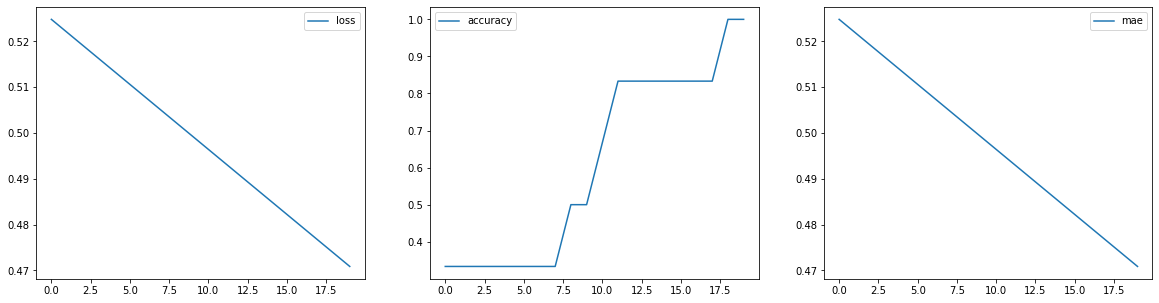

In [3]:
acc = 0
model_0 = Sequential()
w_0 = 0

while(acc != 1):
    model = Sequential()
    model.add(Dense(1, input_dim = 2, activation = 'hard_sigmoid', kernel_initializer='RandomUniform',
                use_bias = True, bias_initializer = 'RandomUniform'))
    model.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['accuracy', 'mean_absolute_error'])#mean_squared_error
    w_0 = model.get_weights()
    history = model.fit(p,t, epochs = 20)
    
    acc = history.history['accuracy'][-1]
    
    if(acc == 1):
        fig, ax = plt.subplots(1, 3, figsize = (20, 5))
        ax[0].plot(history.history['loss'], label = 'loss')
        ax[0].legend()
        ax[1].plot(history.history['accuracy'], label = 'accuracy')
        ax[1].legend()
        ax[2].plot(history.history['mean_absolute_error'], label = 'mae')
        ax[2].legend()
    
    model_0 = model

In [2]:
def border(x, w1, w2, b):#граница классов
    return -(w1/w2)*x - (b/w2)

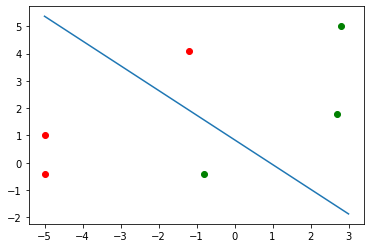

In [6]:
#Первое обучающее множество и ДЛ до обучения
plt.scatter([p[0][0], p[1][0], p[2][0]], [p[0][1], p[1][1], p[2][1]], c = 'r')
plt.scatter([p[3][0], p[4][0], p[5][0]], [p[3][1], p[4][1], p[5][1]], c = 'g')
x = np.linspace(-5, 3, 100)
y = border(x, w_0[0][0], w_0[0][1], w_0[1][0])
plt.plot(x, y)

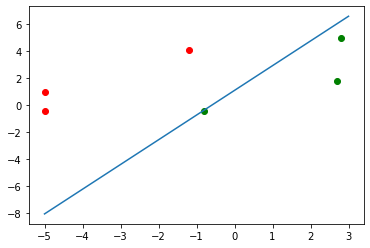

In [7]:
#Первое обучающее множество и ДЛ
plt.scatter([p[0][0], p[1][0], p[2][0]], [p[0][1], p[1][1], p[2][1]], c = 'r')
plt.scatter([p[3][0], p[4][0], p[5][0]], [p[3][1], p[4][1], p[5][1]], c = 'g')
x = np.linspace(-5, 3, 100)
weights_0 = model.get_weights()
y = border(x, weights_0[0][0], weights_0[0][1], weights_0[1][0])
plt.plot(x, y)

In [15]:
#создаем новые точки для проверки
new_dots_1 =[]

for i in range(3):
    new_dots_1.append([np.random.random() * 6 * np.sign(np.random.random() - 0.5), np.random.random() * 6 * np.sign(np.random.random() - 0.5)])

new_dots_1

[[-0.9682586069266923, -3.84325532901811],
 [-3.6317858940807843, 1.4419078447717406],
 [3.1397754736584194, -1.5013339739577602]]

In [16]:
res_1 = np.round(model_0.predict(new_dots_1))

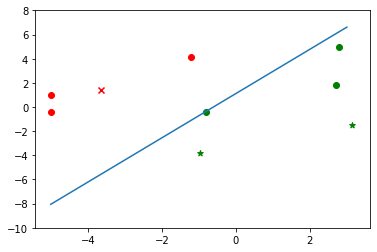

In [17]:
#проверяем

plt.scatter([p[0][0], p[1][0], p[2][0]], [p[0][1], p[1][1], p[2][1]], c = 'r')#класс 0
plt.scatter([p[3][0], p[4][0], p[5][0]], [p[3][1], p[4][1], p[5][1]], c = 'g')#класс 1

class_0_x = []
class_0_y = []
class_1_x = []
class_1_y = []

for i in range(len(new_dots_1)):
    if res_1[i] == 0:
        class_0_x.append(new_dots_1[i][0])
        class_0_y.append(new_dots_1[i][1])
    else:
        class_1_x.append(new_dots_1[i][0])
        class_1_y.append(new_dots_1[i][1])
        
plt.scatter(class_0_x, class_0_y,  c = 'r', marker = 'x')
plt.scatter(class_1_x, class_1_y,  c = 'g', marker = '*')


x = np.linspace(-5, 3, 100)
y = border(x, weights_0[0][0], weights_0[0][1], weights_0[1][0])
plt.ylim([-10, 8])
plt.plot(x, y)

In [18]:
from copy import deepcopy

In [19]:
#Делаю классы линейно неразделимыми

p_2 = deepcopy(p)
t_2 = deepcopy(t)

p_2[3][0] = -2.5
p_2[3][1] = 2.5

p_2[1][0] = 0
p_2[1][1] = 3.1

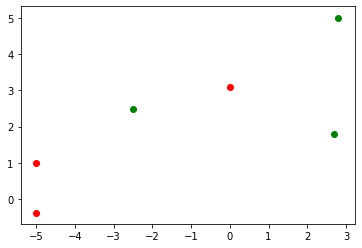

In [20]:
plt.scatter([p_2[0][0], p_2[1][0], p_2[2][0]], [p_2[0][1], p_2[1][1], p_2[2][1]], c = 'r')
plt.scatter([p_2[3][0], p_2[4][0], p_2[5][0]], [p_2[3][1], p_2[4][1], p_2[5][1]], c = 'g')

Epoch 1/20
1/1 [==============================] - 0s 0s/step - loss: 0.4967 - accuracy: 0.5000 - mean_absolute_error: 0.4967
Epoch 2/20
1/1 [==============================] - 0s 4ms/step - loss: 0.4945 - accuracy: 0.5000 - mean_absolute_error: 0.4945
Epoch 3/20
1/1 [==============================] - 0s 4ms/step - loss: 0.4923 - accuracy: 0.5000 - mean_absolute_error: 0.4923
Epoch 4/20
1/1 [==============================] - 0s 4ms/step - loss: 0.4900 - accuracy: 0.5000 - mean_absolute_error: 0.4900
Epoch 5/20
1/1 [==============================] - 0s 0s/step - loss: 0.4878 - accuracy: 0.6667 - mean_absolute_error: 0.4878
Epoch 6/20
1/1 [==============================] - 0s 0s/step - loss: 0.4856 - accuracy: 0.6667 - mean_absolute_error: 0.4856
Epoch 7/20
1/1 [==============================] - 0s 0s/step - loss: 0.4834 - accuracy: 0.6667 - mean_absolute_error: 0.4834
Epoch 8/20
1/1 [==============================] - 0s 0s/step - loss: 0.4811 - accuracy: 0.8333 - mean_absolute_error: 0.48

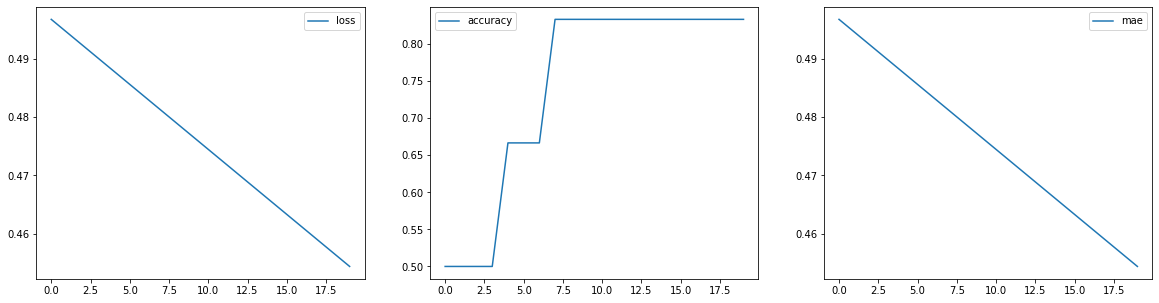

In [32]:
model_1 = Sequential()
model_1.add(Dense(1, input_dim = 2, activation = 'hard_sigmoid', kernel_initializer='RandomUniform',
            use_bias = True, bias_initializer = 'RandomUniform'))
model_1.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['accuracy', 'mean_absolute_error'])#mean_squared_error
w_1 = model_1.get_weights()
history_1 = model_1.fit(p_2,t_2, epochs = 20)

fig, ax = plt.subplots(1, 3, figsize = (20, 5))
ax[0].plot(history_1.history['loss'], label = 'loss')
ax[0].legend()
ax[1].plot(history_1.history['accuracy'], label = 'accuracy')
ax[1].legend()
ax[2].plot(history_1.history['mean_absolute_error'], label = 'mae')
ax[2].legend()

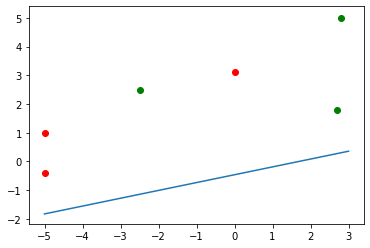

In [33]:
#Первое модифицированное обучающее множество и ДЛ до обучения
plt.scatter([p_2[0][0], p_2[1][0], p_2[2][0]], [p_2[0][1], p_2[1][1], p_2[2][1]], c = 'r')
plt.scatter([p_2[3][0], p_2[4][0], p_2[5][0]], [p_2[3][1], p_2[4][1], p_2[5][1]], c = 'g')
x = np.linspace(-5, 3, 100)
y = border(x, w_1[0][0], w_1[0][1], w_1[1][0])
plt.plot(x, y)

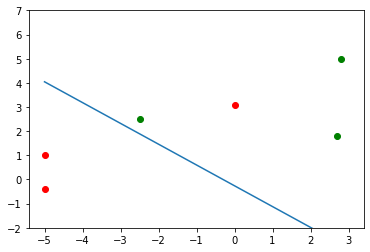

In [34]:
#Первое модифицированное обучающее множество и ДЛ
plt.scatter([p_2[0][0], p_2[1][0], p_2[2][0]], [p_2[0][1], p_2[1][1], p_2[2][1]], c = 'r')
plt.scatter([p_2[3][0], p_2[4][0], p_2[5][0]], [p_2[3][1], p_2[4][1], p_2[5][1]], c = 'g')
x = np.linspace(-5, 3, 100)
weight_1 = model_1.get_weights()
y = border(x, weight_1[0][0], weight_1[0][1], weight_1[1][0])
plt.ylim([-2,7])
plt.plot(x, y)

In [3]:
#Второй датасет
p_3 = []
p_3.append([4.1, -2.2])
p_3.append([2.5, 2.5])
p_3.append([-1.2, 0.6])
p_3.append([-4.3, -4.5])
p_3.append([0.3, 2.7])
p_3.append([4.3, -3.8])
p_3.append([0.6, -0.4])
p_3.append([-4.9, -1.7])

t_3 = []
t_3.append([1, 1])
t_3.append([0, 1])
t_3.append([0, 1])
t_3.append([1, 0])
t_3.append([0, 1])
t_3.append([1, 1])
t_3.append([0, 1])
t_3.append([0, 0])

Epoch 1/800
1/1 [==============================] - 0s 31ms/step - loss: 0.4823 - accuracy: 0.7500 - mean_absolute_error: 0.4823
Epoch 2/800
1/1 [==============================] - 0s 0s/step - loss: 0.4802 - accuracy: 0.7500 - mean_absolute_error: 0.4802
Epoch 3/800
1/1 [==============================] - 0s 2ms/step - loss: 0.4787 - accuracy: 0.7500 - mean_absolute_error: 0.4787
Epoch 4/800
1/1 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.7500 - mean_absolute_error: 0.4775
Epoch 5/800
1/1 [==============================] - 0s 2ms/step - loss: 0.4763 - accuracy: 0.7500 - mean_absolute_error: 0.4763
Epoch 6/800
1/1 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.8750 - mean_absolute_error: 0.4753
Epoch 7/800
1/1 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.8750 - mean_absolute_error: 0.4744
Epoch 8/800
1/1 [==============================] - 0s 999us/step - loss: 0.4735 - accuracy: 0.8750 - mean_absol

1/1 [==============================] - 0s 5ms/step - loss: 0.3944 - accuracy: 1.0000 - mean_absolute_error: 0.3944
Epoch 127/800
1/1 [==============================] - 0s 4ms/step - loss: 0.3938 - accuracy: 1.0000 - mean_absolute_error: 0.3938
Epoch 128/800
1/1 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 1.0000 - mean_absolute_error: 0.3931
Epoch 129/800
1/1 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 1.0000 - mean_absolute_error: 0.3925
Epoch 130/800
1/1 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 1.0000 - mean_absolute_error: 0.3918
Epoch 131/800
1/1 [==============================] - 0s 5ms/step - loss: 0.3912 - accuracy: 1.0000 - mean_absolute_error: 0.3912
Epoch 132/800
1/1 [==============================] - 0s 5ms/step - loss: 0.3905 - accuracy: 1.0000 - mean_absolute_error: 0.3905
Epoch 133/800
1/1 [==============================] - 0s 3ms/step - loss: 0.3898 - accuracy: 1.0000 - mean_absol

1/1 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 1.0000 - mean_absolute_error: 0.3126
Epoch 252/800
1/1 [==============================] - 0s 2ms/step - loss: 0.3119 - accuracy: 1.0000 - mean_absolute_error: 0.3119
Epoch 253/800
1/1 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 1.0000 - mean_absolute_error: 0.3112
Epoch 254/800
1/1 [==============================] - 0s 3ms/step - loss: 0.3106 - accuracy: 1.0000 - mean_absolute_error: 0.3106
Epoch 255/800
1/1 [==============================] - 0s 3ms/step - loss: 0.3099 - accuracy: 1.0000 - mean_absolute_error: 0.3099
Epoch 256/800
1/1 [==============================] - 0s 3ms/step - loss: 0.3093 - accuracy: 1.0000 - mean_absolute_error: 0.3093
Epoch 257/800
1/1 [==============================] - 0s 4ms/step - loss: 0.3086 - accuracy: 1.0000 - mean_absolute_error: 0.3086
Epoch 258/800
1/1 [==============================] - 0s 3ms/step - loss: 0.3080 - accuracy: 1.0000 - mean_absol

Epoch 377/800
1/1 [==============================] - 0s 3ms/step - loss: 0.2475 - accuracy: 1.0000 - mean_absolute_error: 0.2475
Epoch 378/800
1/1 [==============================] - 0s 4ms/step - loss: 0.2470 - accuracy: 1.0000 - mean_absolute_error: 0.2470
Epoch 379/800
1/1 [==============================] - 0s 998us/step - loss: 0.2466 - accuracy: 1.0000 - mean_absolute_error: 0.2466
Epoch 380/800
1/1 [==============================] - 0s 4ms/step - loss: 0.2461 - accuracy: 1.0000 - mean_absolute_error: 0.2461
Epoch 381/800
1/1 [==============================] - 0s 2ms/step - loss: 0.2456 - accuracy: 1.0000 - mean_absolute_error: 0.2456
Epoch 382/800
1/1 [==============================] - 0s 2ms/step - loss: 0.2452 - accuracy: 1.0000 - mean_absolute_error: 0.2452
Epoch 383/800
1/1 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 1.0000 - mean_absolute_error: 0.2447
Epoch 384/800
1/1 [==============================] - 0s 2ms/step - loss: 0.2442 - accuracy: 1.0

1/1 [==============================] - 0s 2ms/step - loss: 0.1999 - accuracy: 1.0000 - mean_absolute_error: 0.1999
Epoch 501/800
1/1 [==============================] - 0s 4ms/step - loss: 0.1995 - accuracy: 1.0000 - mean_absolute_error: 0.1995
Epoch 502/800
1/1 [==============================] - 0s 4ms/step - loss: 0.1991 - accuracy: 1.0000 - mean_absolute_error: 0.1991
Epoch 503/800
1/1 [==============================] - 0s 4ms/step - loss: 0.1988 - accuracy: 1.0000 - mean_absolute_error: 0.1988
Epoch 504/800
1/1 [==============================] - 0s 3ms/step - loss: 0.1984 - accuracy: 1.0000 - mean_absolute_error: 0.1984
Epoch 505/800
1/1 [==============================] - 0s 4ms/step - loss: 0.1980 - accuracy: 1.0000 - mean_absolute_error: 0.1980
Epoch 506/800
1/1 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 1.0000 - mean_absolute_error: 0.1977
Epoch 507/800
1/1 [==============================] - 0s 5ms/step - loss: 0.1973 - accuracy: 1.0000 - mean_absol

1/1 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 1.0000 - mean_absolute_error: 0.1639
Epoch 626/800
1/1 [==============================] - 0s 2ms/step - loss: 0.1637 - accuracy: 1.0000 - mean_absolute_error: 0.1637
Epoch 627/800
1/1 [==============================] - 0s 5ms/step - loss: 0.1634 - accuracy: 1.0000 - mean_absolute_error: 0.1634
Epoch 628/800
1/1 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.8750 - mean_absolute_error: 0.1632
Epoch 629/800
1/1 [==============================] - 0s 4ms/step - loss: 0.1630 - accuracy: 1.0000 - mean_absolute_error: 0.1630
Epoch 630/800
1/1 [==============================] - 0s 998us/step - loss: 0.1628 - accuracy: 1.0000 - mean_absolute_error: 0.1628
Epoch 631/800
1/1 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.8750 - mean_absolute_error: 0.1625
Epoch 632/800
1/1 [==============================] - 0s 2ms/step - loss: 0.1623 - accuracy: 1.0000 - mean_abs

1/1 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 1.0000 - mean_absolute_error: 0.1393
Epoch 751/800
1/1 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.8750 - mean_absolute_error: 0.1391
Epoch 752/800
1/1 [==============================] - 0s 4ms/step - loss: 0.1389 - accuracy: 1.0000 - mean_absolute_error: 0.1389
Epoch 753/800
1/1 [==============================] - 0s 2ms/step - loss: 0.1387 - accuracy: 1.0000 - mean_absolute_error: 0.1387
Epoch 754/800
1/1 [==============================] - 0s 5ms/step - loss: 0.1386 - accuracy: 1.0000 - mean_absolute_error: 0.1386
Epoch 755/800
1/1 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 1.0000 - mean_absolute_error: 0.1384
Epoch 756/800
1/1 [==============================] - 0s 3ms/step - loss: 0.1382 - accuracy: 0.8750 - mean_absolute_error: 0.1382
Epoch 757/800
1/1 [==============================] - 0s 4ms/step - loss: 0.1381 - accuracy: 1.0000 - mean_absol

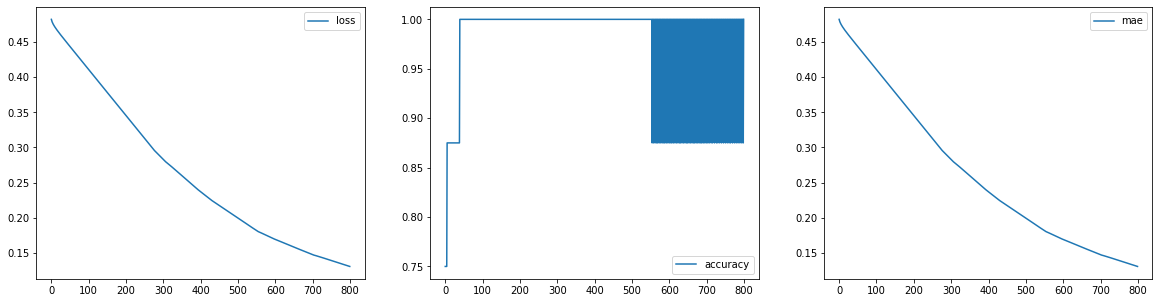

In [4]:
acc = 0
model_2_ = Sequential()
w_2 = 0

while(acc != 1):
    model_2 = Sequential()
    model_2.add(Dense(2, input_dim = 2, activation = 'hard_sigmoid', kernel_initializer='RandomUniform',
                use_bias = True, bias_initializer = 'RandomUniform'))
    model_2.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['accuracy', 'mean_absolute_error'])#mean_squared_error
    w_2 = model_2.get_weights()
    history_2 = model_2.fit(p_3,t_3, epochs = 800)
    acc = history_2.history['accuracy'][-1] 

    if(acc == 1):
        fig, ax = plt.subplots(1, 3, figsize = (20, 5))
        ax[0].plot(history_2.history['loss'], label = 'loss')
        ax[0].legend()
        ax[1].plot(history_2.history['accuracy'], label = 'accuracy')
        ax[1].legend()
        ax[2].plot(history_2.history['mean_absolute_error'], label = 'mae')
        ax[2].legend()
        
    model_2_ = model_2

In [4]:
def hardlim(a):
    ret = []
    for i in range(0, len(a)):
        if(a[i] > 0):
            ret.append(1)
        else:
            ret.append(0)
    return ret



def Rosenblat2(p,t):
    weights = np.random.random((2,2))
    bias = np.random.random((2,1))
    #print(len(p))
    while 1:
        error_counter = 0
        prikol = 1
        
        for i in range(len(p)):
            error = np.zeros((2,1))
            p_ = np.zeros((2,1))
            p_[0][0] = p[i][0]
            p_[1][0] = p[i][1]
            error[0] = t[i][0] - hardlim(np.dot(weights, p_) + bias)[0]
            error[1] = t[i][1] - hardlim(np.dot(weights, p_) + bias)[1]
            
            #print(error)
            
            if(error[0] != 0 or error[1] != 0):
                weights += np.dot(error, p_.transpose())
                bias += error
                error_counter += 1
        prikol += 1
        print(error_counter)
        if(error_counter == 0):
            break
    bias.shape = (2,)            
    return weights.transpose(), bias

In [28]:
res = Rosenblat2(p_3, t_3)
print(res)

weig = res[0]
weig = weig.reshape(list(reversed(weig.shape)))
model_2 = Sequential()
model_2.add(Dense(2, input_dim = 2, activation = 'hard_sigmoid', kernel_initializer='RandomUniform',
                use_bias = True, bias_initializer = 'RandomUniform'))
model_2.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['accuracy', 'mean_absolute_error'])#mean_squared_error

model_2.set_weights(res)
model_2.get_weights()
#res

3
3
1
0
(array([[ 0.71130206,  2.51311221],
       [-3.29931876,  0.61528856]]), array([-2.53025272,  4.53012863]))


[array([[ 0.71130204,  2.5131123 ],
        [-3.2993188 ,  0.61528856]], dtype=float32),
 array([-2.5302527,  4.5301285], dtype=float32)]

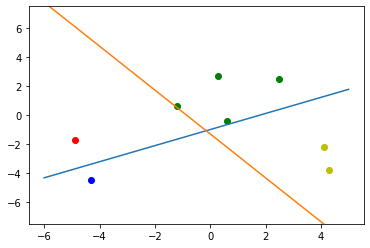

In [6]:
#Третье множество и ДЛ до обучения
w_2 = model_2.get_weights()
plt.ylim([-7.5,7.5])
plt.scatter(p_3[7][0], p_3[7][1], c = 'r')#00
plt.scatter([p_3[1][0], p_3[2][0], p_3[4][0], p_3[6][0]], [p_3[1][1], p_3[2][1], p_3[4][1], p_3[6][1]], c = 'g')#01
plt.scatter(p_3[3][0], p_3[3][1], c = 'b')#10
plt.scatter([p_3[0][0], p_3[5][0]], [p_3[0][1], p_3[5][1]], c = 'y')#11
x = np.linspace(-6, 5, 100)
y1 = border(x, w_2[0][0][0], w_2[0][1][0], w_2[1][0])
y2 = border(x, w_2[0][0][1], w_2[0][1][1], w_2[1][1])
plt.plot(x, y1)
plt.plot(x, y2)

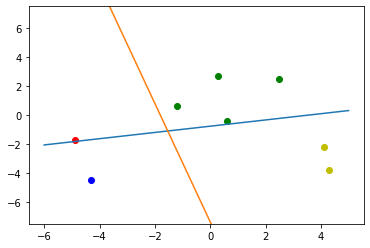

In [29]:
#Третье множество и ДЛ после обучения
weights_2 = model_2.get_weights()
plt.ylim([-7.5,7.5])
plt.scatter(p_3[7][0], p_3[7][1], c = 'r')#00
plt.scatter([p_3[1][0], p_3[2][0], p_3[4][0], p_3[6][0]], [p_3[1][1], p_3[2][1], p_3[4][1], p_3[6][1]], c = 'g')#01
plt.scatter(p_3[3][0], p_3[3][1], c = 'b')#10
plt.scatter([p_3[0][0], p_3[5][0]], [p_3[0][1], p_3[5][1]], c = 'y')#11
x = np.linspace(-6, 5, 100)
y1 = border(x, weights_2[0][0][0], weights_2[0][1][0], weights_2[1][0])
y2 = border(x, weights_2[0][0][1], weights_2[0][1][1], weights_2[1][1])
plt.plot(x, y1)
plt.plot(x, y2)

In [25]:
#создаем новые точки для проверки
new_dots_2 =[]

for i in range(5):
    new_dots_2.append([np.random.random() * 6 * np.sign(np.random.random() - 0.5), np.random.random() * 6 * np.sign(np.random.random() - 0.5)])

new_dots_2

[[1.6795484457414007, -4.6284691361757595],
 [-3.0294322463932275, -1.7522937959685736],
 [0.7086375709906778, 5.514331785646543],
 [3.037310267075718, -0.23980033692943992],
 [-2.665577201363348, -5.218297754456617]]

In [26]:
res_2 = np.round(model_2.predict(new_dots_2))
res_2

array([[1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 1.],
       [1., 0.]], dtype=float32)

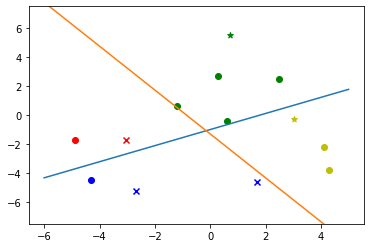

In [27]:
#проверяем

plt.ylim([-7.5,7.5])
plt.scatter(p_3[7][0], p_3[7][1], c = 'r')#00
plt.scatter([p_3[1][0], p_3[2][0], p_3[4][0], p_3[6][0]], [p_3[1][1], p_3[2][1], p_3[4][1], p_3[6][1]], c = 'g')#01
plt.scatter(p_3[3][0], p_3[3][1], c = 'b')#10
plt.scatter([p_3[0][0], p_3[5][0]], [p_3[0][1], p_3[5][1]], c = 'y')#11

class_0_x_2 = []
class_0_y_2 = []
class_1_x_2 = []
class_1_y_2 = []
class_2_x_2 = []
class_2_y_2 = []
class_3_x_2 = []
class_3_y_2 = []

for i in range(len(new_dots_2)):
    if res_2[i][0] == 0 and res_2[i][1] == 0:
        class_0_x_2.append(new_dots_2[i][0])
        class_0_y_2.append(new_dots_2[i][1])
    if res_2[i][0] == 0 and res_2[i][1] == 1:
        class_1_x_2.append(new_dots_2[i][0])
        class_1_y_2.append(new_dots_2[i][1])
    if res_2[i][0] == 1 and res_2[i][1] == 0:
        class_2_x_2.append(new_dots_2[i][0])
        class_2_y_2.append(new_dots_2[i][1])
    if res_2[i][0] == 1 and res_2[i][1] == 1:
        class_3_x_2.append(new_dots_2[i][0])
        class_3_y_2.append(new_dots_2[i][1])
        
plt.scatter(class_0_x_2, class_0_y_2,  c = 'r', marker = 'x')
plt.scatter(class_1_x_2, class_1_y_2,  c = 'g', marker = '*')
plt.scatter(class_2_x_2, class_2_y_2,  c = 'b', marker = 'x')
plt.scatter(class_3_x_2, class_3_y_2,  c = 'y', marker = '*')

x = np.linspace(-6, 5, 100)
y1 = border(x, weights_2[0][0][0], weights_2[0][1][0], weights_2[1][0])
y2 = border(x, weights_2[0][0][1], weights_2[0][1][1], weights_2[1][1])
plt.plot(x, y1)
plt.plot(x, y2)